# Exemplo - Plot com Dados do Higgs

Minicurso Python Básico - A Nepomuceno (jun/21)

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
#funcao bkg
def bkg(x,lbkg):
    return lbkg[0] + lbkg[1]*x + lbkg[2]*x**2 + lbkg[3]*x**3

In [3]:
#funcao sinal
def sinal(x,lsig):
    return lsig[0]*np.exp(-0.5*((x-lsig[1])/lsig[2])**2)

In [4]:
par_bkg = [24415.1,-356.488,1.80183,-0.00307196]
par_sig = [200,126.218,2.3875]

In [5]:
data_higgs = np.loadtxt('higgs_data.csv',delimiter=",")
#rapida inspecao nos dados
data_higgs[:5]

array([[ 101., 3635.],
       [ 103., 3391.],
       [ 105., 3339.],
       [ 107., 3148.],
       [ 109., 2983.]])

In [6]:
data_x = data_higgs[:,0]
data_y = data_higgs[:,1]
print(data_higgs[:,0].min())
print(data_higgs[:,0].max())

101.0
159.0


In [7]:
x = np.linspace(100,160,200)
f_total = bkg(x,par_bkg)+sinal(x,par_sig)

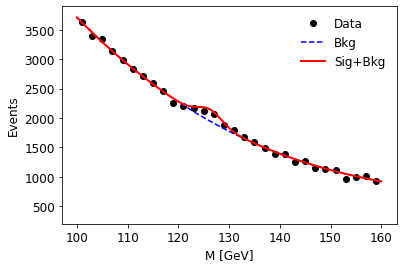

In [8]:
#plt.style.use('bmh')
plt.plot(data_x,data_y,"ko",label='Data')
plt.plot(x,bkg(x,par_bkg),'b--',label='Bkg')
plt.plot(x,f_total,'r-',lw=2,label='Sig+Bkg')
plt.ylim(200,3900)
plt.xlabel('M [GeV]',fontsize=12)
plt.ylabel('Events',fontsize=12)
ax = plt.gca()
ax.tick_params(labelsize=12)  #tamanha de fonte dos eixos
plt.legend(frameon=False,fontsize=12)
plt.savefig("higgs_data.pdf")